In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#from dataset import train, test

Mounted at /content/drive


In [ ]:
!pip install opencv-python==4.5.5.64

In [ ]:
import os


# TODO: Fill in the Google Drive path where you uploaded the lab materials
# Example: GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Lab materials 01-20210104'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/ComputerVision_lab/CW' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
#GOOGLE_DRIVE_PATH_DATASET = 'Colab Notebooks/ComputerVision_lab/CW/dataset'
print(os.listdir(GOOGLE_DRIVE_PATH))

#IMAGES
images_directory = 'Colab Notebooks/ComputerVision_lab/CW/dataset/train/images'
GOOGLE_DRIVE_PATH_IMAGES = os.path.join('drive', 'My Drive', images_directory)
print(os.listdir(GOOGLE_DRIVE_PATH_IMAGES))
#LABELS
labels_directory = 'Colab Notebooks/ComputerVision_lab/CW/dataset/train/labels'
GOOGLE_DRIVE_PATH_LABELS = os.path.join('drive', 'My Drive', labels_directory)
print(os.listdir(GOOGLE_DRIVE_PATH_LABELS))

#TEST images
test_images_directory = 'Colab Notebooks/ComputerVision_lab/CW/dataset/test/images'
GOOGLE_DRIVE_PATH_TEST_IMAGES = os.path.join('drive', 'My Drive', test_images_directory)
print(os.listdir(GOOGLE_DRIVE_PATH_TEST_IMAGES))

#TEST LABELS
test_labels_directory = 'Colab Notebooks/ComputerVision_lab/CW/dataset/test/labels'
GOOGLE_DRIVE_PATH_TEST_LABELS = os.path.join('drive', 'My Drive', test_labels_directory)
print(os.listdir(GOOGLE_DRIVE_PATH_TEST_LABELS))



['CV2023_CW_Dataset (1).zip', 'dataset', 'CNN_model.joblib', 'svm_model.joblib', 'kclustering_svm_sift_model.joblib', 'CVWildPhotosDataset', 'svm_HOG_model.joblib', 'mlp_HOG_model.joblib', 'TestFile.ipynb', 'CWTrain.ipynb']
['image_1255.jpeg', 'image_1425.jpeg', 'image_1405.jpeg', 'image_1453.jpeg', 'image_1362.jpeg', 'image_1463.jpeg', 'image_1514.jpeg', 'image_1565.jpeg', 'image_1256.jpeg', 'image_1349.jpeg', 'image_1342.jpeg', 'image_1504.jpeg', 'image_1566.jpeg', 'image_1373.jpeg', 'image_1539.jpeg', 'image_1365.jpeg', 'image_1451.jpeg', 'image_1211.jpeg', 'image_1249.jpeg', 'image_1503.jpeg', 'image_1366.jpeg', 'image_1481.jpeg', 'image_1436.jpeg', 'image_1207.jpeg', 'image_1516.jpeg', 'image_1236.jpeg', 'image_1355.jpeg', 'image_1283.jpeg', 'image_1358.jpeg', 'image_1272.jpeg', 'image_1252.jpeg', 'image_1511.jpeg', 'image_1521.jpeg', 'image_1250.jpeg', 'image_1312.jpeg', 'image_1382.jpeg', 'image_1452.jpeg', 'image_1262.jpeg', 'image_1309.jpeg', 'image_1221.jpeg', 'image_1472.jpe

In [ ]:
!pip show opencv-python

Name: opencv-python
Version: 4.7.0.72
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /usr/local/lib/python3.9/dist-packages
Requires: numpy, numpy, numpy
Required-by: dopamine-rl, imgaug


In [ ]:
import cv2
from sklearn.model_selection import train_test_split
from skimage import img_as_ubyte, io, color, filters
from sklearn.cluster import MiniBatchKMeans
from sklearn import svm, metrics
import matplotlib.pyplot as plt
import numpy as np
from skimage import transform
from skimage import filters
from collections import Counter

%matplotlib inline

In [ ]:
from skimage import transform
def import_selected_data():
    """Load images and labels from selected directories"""
    images = []
    labels = []
    test_images = []
    test_labels = []
    ##CHANGED THIS TO 128 BECAUSE I WANT TO TEST IT FOR SIFT. IT WAS ON 90,90 FOR HOG
    new_size = (90, 90) # set the desired size of the images
    

    for filename in sorted (os.listdir(GOOGLE_DRIVE_PATH_IMAGES)):
      if filename.endswith('jpeg'):
        image = io.imread(os.path.join(GOOGLE_DRIVE_PATH_IMAGES,filename))
        
        #IMAGES ARE NOT BEING CHANGED TO GRAY
        #img = img_as_ubyte(color.rgb2gray(image))
        

        img_resized = transform.resize(image,new_size)

        images.append(img_resized)

    for filename in sorted(os.listdir(GOOGLE_DRIVE_PATH_LABELS)):
      if filename.endswith('txt') : 
        #labels_filename = filename.split('.')[0] + 'txt'
        labels_path = os.path.join(GOOGLE_DRIVE_PATH_LABELS, filename)
        with open(labels_path, 'r') as f:
          label = f.read().strip()
          labels.append(label) 

    #TEST
    for filename in sorted (os.listdir(GOOGLE_DRIVE_PATH_TEST_IMAGES)):
      if filename.endswith('jpeg'):
        image = io.imread(os.path.join(GOOGLE_DRIVE_PATH_TEST_IMAGES,filename))

        #HERE TOO, IMAGES ARE NOT BEING CHANGED
        #img = img_as_ubyte(color.rgb2gray(image))
        

        img_resized = transform.resize(image,new_size)

        
        
        test_images.append(img_resized)  

    for filename in sorted(os.listdir(GOOGLE_DRIVE_PATH_TEST_LABELS)):
      if filename.endswith('txt') : 
        #labels_filename = filename.split('.')[0] + 'txt'
        labels_path = os.path.join(GOOGLE_DRIVE_PATH_TEST_LABELS, filename)
        with open(labels_path, 'r') as f:
          label = f.read().strip()
          test_labels.append(label)  

    return images, labels, test_images, test_labels

In [ ]:
from skimage import transform
X_train, y_train, X_test, y_test = import_selected_data()

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)


In [ ]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy.ndimage import shift
from scipy.ndimage import rotate


# Initiate SIFT detector
#sift = cv2.SIFT_create(nfeatures=0, nOctaveLayers=3, contrastThreshold=0.03, edgeThreshold=10, sigma=1.6)
sift = cv2.SIFT_create()

# Create empty lists for feature descriptors and labels
des_list = []
y_train_list = []

for i in range(len(X_train)):
    # Identify keypoints and extract descriptors with SIFT
    img = img_as_ubyte(color.rgb2gray(X_train[i]))
    kp, des = sift.detectAndCompute(img, None)

    # Append list of descriptors and label to respective lists
    if des is not None:
        des_list.append(des)
        y_train_list.append(y_train[i])

    
    img_flip = np.fliplr(img)
    kp_flip, fd_flip = sift.detectAndCompute(img_flip, None)
    if fd_flip is not None:
    # Add flipped SIFT descriptors and label to respective lists
        des_list.append(fd_flip)
        y_train_list.append(y_train[i])

    #ROTATING 
    img_rotated = rotate(img, 30, reshape=False)
    kp_rotate, fd_rotate = sift.detectAndCompute(img_rotated, None)
    if fd_rotate is not None:
      des_list.append(fd_rotate)
      y_train_list.append(y_train[i])

    # Augment data by shifting image up
    img_shift_up = shift(img, [-10, 0])
    kp_shift_up, fd_shift_up = sift.detectAndCompute(img_shift_up, None)
    if fd_shift_up is not None:
        # Add shifted SIFT descriptors and label to respective lists
        des_list.append(fd_shift_up)
        y_train_list.append(y_train[i])
    # Augment data by shifting image down
    img_shift_down = shift(img, [10, 0])
    kp_shift_down, fd_shift_down = sift.detectAndCompute(img_shift_up, None)
    if fd_shift_down is not None:
        # Add shifted SIFT descriptors and label to respective lists
        des_list.append(fd_shift_down)
        y_train_list.append(y_train[i])
    # Augment data by shifting image right
    img_shift_right = shift(img, [0, 10])
    kp_shift_right, fd_shift_right = sift.detectAndCompute(img_shift_right, None)
    if fd_shift_right is not None:
        # Add shifted SIFT descriptors and label to respective lists
        des_list.append(fd_shift_right)
        y_train_list.append(y_train[i]) 
    # Augment data by shifting image up
    img_flip_shift_up = shift(img_flip, [-10, 0])
    kp_flip_shift_up, fd_flip_shift_up = sift.detectAndCompute(img_flip_shift_up, None)
    if fd_flip_shift_up is not None:
        # Add shifted SIFT descriptors and label to respective lists
        des_list.append(fd_flip_shift_up)
        y_train_list.append(y_train[i])
    img_flip_shift_up = shift(img_flip, [-10, 0])
    kp_flip_shift_up, fd_flip_shift_up = sift.detectAndCompute(img_flip_shift_up, None)
    if fd_flip_shift_up is not None:
        # Add shifted SIFT descriptors and label to respective lists
        des_list.append(fd_flip_shift_up)
        y_train_list.append(y_train[i])

    # Augment data by shifting image down
    img_flip_shift_down = shift(img_flip, [20, 0])
    kp_flip_shift_down, fd_flip_shift_down = sift.detectAndCompute(img_flip_shift_down, None)
    if fd_flip_shift_down is not None:
        # Add shifted SIFT descriptors and label to respective lists
        des_list.append(fd_flip_shift_down)
        y_train_list.append(y_train[i])
    
    # Augment data by shifting image left
    img_flip_shift_left = shift(img_flip, [0, -10])
    kp_flip_shift_left, fd_flip_shift_left = sift.detectAndCompute(img_flip_shift_left, None)
    if fd_flip_shift_left is not None:
        # Add shifted SIFT descriptors and label to respective lists
        des_list.append(fd_flip_shift_left)
        y_train_list.append(y_train[i])
    
    # Augment data by shifting image right
    img_flip_shift_right = shift(img_flip, [0, 10])
    kp_flip_shift_right, fd_flip_shift_right = sift.detectAndCompute(img_flip_shift_right, None)
    if fd_flip_shift_right is not None:
        # Add shifted SIFT descriptors and label to respective lists
        des_list.append(fd_flip_shift_right)
        y_train_list.append(y_train[i])
"""
     

    

    # Augment data by shifting image left
    img_shift_left = shift(img, [0, -10])
    kp_shift_left, fd_shift_left = sift.detectAndCompute(img_shift_left, None)
    if fd_shift_left is not None:
        # Add shifted SIFT descriptors and label to respective lists
        des_list.append(fd_shift_left)
        y_train_list.append(y_train[i])    

    

    # Augment data by shifting image up
    

    

"""  



# Convert to array for easier handling
des_array = np.vstack(des_list)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Use MiniBatchKMeans
k = len(np.unique(y_train)) * 20
print(des_array.shape[0]//4)
batch_size = des_array.shape[0] // 4
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, n_init='auto').fit(des_array)




# Convert descriptors into histograms of codewords for each image
hist_list = []
idx_list = []

for des in des_list:
    hist = np.zeros(k)

    idx = kmeans.predict(des)
    idx_list.append(idx)
    for j in idx:
        hist[j] = hist[j] + (1 / len(des))
    hist_list.append(hist)

hist_array = np.vstack(hist_list)

147654


In [ ]:


# Create a classifier: a support vector classifier
#svm_sift = svm.SVC(kernel='rbf', C=10, gamma=1, class_weight='balanced')

classifier = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=100, alpha=0.0001,
                           solver='adam', verbose=True, random_state=1,
                           learning_rate_init=0.001)
classifier.fit(hist_array, y_train_list)

# Create a bagging classifier
#USED GRIDSEARCH CV FOR BETTER ACCURACY
"""
param_grid = { 'C' : [0.1, 1, 10, 100],
              'gamma' : [0.0001, 0.001, 0.1, 1],
              'kernel': ['rbf', 'poly']}
              """
#bagging_svm_sift = BaggingClassifier(base_estimator=svm_sift, n_estimators=50, random_state=42)
# Define the parameter grid
"""
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
}


grid_search = GridSearchCV(svm_sift, param_grid, cv=5, n_jobs=-1)

grid_search.fit(hog_features, y_train_list)
"""

#classifier_new.fit(hist_array, y_train_list)
#bagging_svm_sift.fit(hist_array, y_train_list)



Iteration 1, loss = 0.60242759
Iteration 2, loss = 0.47578423
Iteration 3, loss = 0.45837863
Iteration 4, loss = 0.44567609
Iteration 5, loss = 0.43617674
Iteration 6, loss = 0.42171827
Iteration 7, loss = 0.41362512
Iteration 8, loss = 0.40074604
Iteration 9, loss = 0.39192729
Iteration 10, loss = 0.38272099
Iteration 11, loss = 0.37141566
Iteration 12, loss = 0.36437773
Iteration 13, loss = 0.35740927
Iteration 14, loss = 0.34784381
Iteration 15, loss = 0.34172245
Iteration 16, loss = 0.33323391
Iteration 17, loss = 0.33389312
Iteration 18, loss = 0.32210218
Iteration 19, loss = 0.31899320
Iteration 20, loss = 0.30986076
Iteration 21, loss = 0.30433318
Iteration 22, loss = 0.29993980
Iteration 23, loss = 0.28943885
Iteration 24, loss = 0.28322434
Iteration 25, loss = 0.27718281
Iteration 26, loss = 0.27100639
Iteration 27, loss = 0.26383133
Iteration 28, loss = 0.25998279
Iteration 29, loss = 0.25482524
Iteration 30, loss = 0.25002428
Iteration 31, loss = 0.23885504
Iteration 32, los

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=100, random_state=1,
              verbose=True)

In [ ]:
# Convert test set into codeword histograms
hist_list = []



for i in range(len(X_test)):
    img = img_as_ubyte(color.rgb2gray(X_test[i]))
    kp, des = sift.detectAndCompute(img, None)

    if des is not None:
        hist = np.zeros(k)

        idx = kmeans.predict(des)

        for j in idx:
            hist[j] = hist[j] + (1 / len(des))

        #hist = scale.transform(hist.reshape(1, -1))
        hist_list.append(hist)

    else:
        hist_list.append(None)

# Remove potential cases of images with no descriptors
idx_not_empty = [i for i, x in enumerate(hist_list) if x is not None]
hist_list = [hist_list[i] for i in idx_not_empty]
y_test = [y_test[i] for i in idx_not_empty]
hist_array = np.vstack(hist_list)

y_pred_new = classifier.predict(hist_array).tolist()


print(f"""Classification report for classifier {classifier}:
      {metrics.classification_report(y_test, y_pred_new)}\n""")

Classification report for classifier MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=100, random_state=1,
              verbose=True):
                    precision    recall  f1-score   support

           0       0.35      0.49      0.41        51
           1       0.90      0.88      0.89       384
           2       0.33      0.11      0.16        19

    accuracy                           0.81       454
   macro avg       0.53      0.49      0.49       454
weighted avg       0.82      0.81      0.81       454




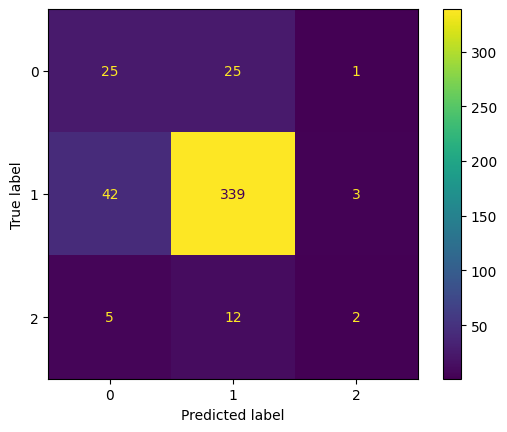

In [ ]:

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_new)

#classifier_new = svm.SVC(kernel='rbf', C=10, gamma=1, class_weight='balanced')

HOG Features descriptor


In [ ]:
import joblib
# Save the trained model to a file SVM + SIFT
joblib.dump(classifier, GOOGLE_DRIVE_PATH + '/mlp_sift_model.joblib')

['drive/My Drive/Colab Notebooks/ComputerVision_lab/CW/mlp_sift_model.joblib']

In [ ]:
joblib.dump(kmeans, GOOGLE_DRIVE_PATH + '/kclustering_mlp_sift_model.joblib')

['drive/My Drive/Colab Notebooks/ComputerVision_lab/CW/kclustering_mlp_sift_model.joblib']

In [ ]:
print(k)

60


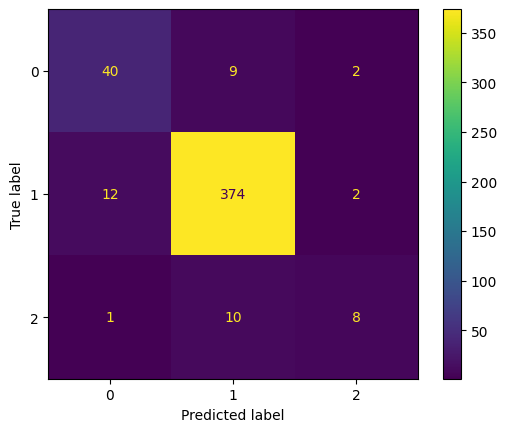

In [ ]:
from skimage.feature.sift import rescale
from sklearn.model_selection import GridSearchCV
from skimage import feature, util
from skimage.color import rgb2gray
from skimage import img_as_ubyte
from sklearn import svm, metrics
from skimage import transform
from sklearn.neural_network import MLPClassifier
from scipy.ndimage import zoom
from skimage import exposure
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



hog_features = []
y_train_list = []



# Extract HOG features from training data
for i in range(len(X_train)):
    img = img_as_ubyte(color.rgb2gray(X_train[i]))
    
    #img = X_train[i]

    fd = feature.hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False, block_norm='L2' )
    if fd is not None:
        # Pad feature descriptor with zeros to make it the same length
        #fd_padded = np.pad(fd, (0, max_len - len(fd)), mode='constant')
        hog_features.append(fd)
        y_train_list.append(y_train[i])

    #image flip horizontal
    img_flip = np.fliplr(img)
    fd_flip = feature.hog(img_flip, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False, block_norm='L2')
    if (fd_flip is not None):
      hog_features.append(fd_flip)
      y_train_list.append(y_train[i])

    #image shift up
    img_shift_up = transform.warp(img, transform.AffineTransform(translation=(0, -20)))
    
    fd_shift_up = feature.hog(img_shift_up, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False, block_norm='L2')
    if fd_shift_up is not None:
      hog_features.append(fd_shift_up)
      y_train_list.append(y_train[i])
      

    #image shift down
    img_shift_down = transform.warp(img, transform.AffineTransform(translation=(0, 10)))
    
    fd_shift_down = feature.hog(img_shift_down, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False, block_norm='L2')
    if fd_shift_down is not None:
      hog_features.append(fd_shift_down)
      y_train_list.append(y_train[i])
      

    #image shift left
    img_shift_left = transform.warp(img, transform.AffineTransform(translation=(-10, 0)))
    
    fd_shift_left = feature.hog(img_shift_left, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False, block_norm='L2')
    if fd_shift_left is not None:
      hog_features.append(fd_shift_left)
      y_train_list.append(y_train[i])

    #image shift right
    img_shift_right = transform.warp(img, transform.AffineTransform(translation=(10, 0)))
    
    fd_shift_right = feature.hog(img_shift_right, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False, block_norm='L2')
    if fd_shift_right is not None:
      hog_features.append(fd_shift_right)
      y_train_list.append(y_train[i])



    # Flip and shift up
    img_hflip_shift_up = np.fliplr(img_shift_up)

    fd_hflip_shift_up = feature.hog(img_hflip_shift_up, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False, block_norm='L2')
    if fd_hflip_shift_up is not None:
      hog_features.append(fd_hflip_shift_up)
      y_train_list.append(y_train[i])

    # Flip and shift down  
    img_hflip_shift_down = np.fliplr(img_shift_down)
    fd_hflip_shift_down = feature.hog(img_hflip_shift_down, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False, block_norm='L2')
    if fd_hflip_shift_down is not None:
      hog_features.append(fd_hflip_shift_down)
      y_train_list.append(y_train[i])

    #ROTATING 
    rotated_img = transform.rotate(img, angle=90, order=3, mode='reflect')
    fd_rotate_scale = feature.hog(rotated_img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False, block_norm='L2')
    if fd_rotate_scale is not None:
      hog_features.append(fd_rotate_scale)
      y_train_list.append(y_train[i])

    # Flip and shift left
    img_hflip_shift_left = np.fliplr(img_shift_left)
    fd_hflip_shift_left = feature.hog(img_hflip_shift_left, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False, block_norm='L2')
    if fd_hflip_shift_left is not None:
      hog_features.append(fd_hflip_shift_left)
      y_train_list.append(y_train[i])

    # Flip and shift right
    img_hflip_shift_right = np.fliplr(img_shift_right)
    fd_hflip_shift_right = feature.hog(img_hflip_shift_right, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False, block_norm='L2')
    if fd_hflip_shift_right is not None:
      hog_features.append(fd_hflip_shift_right)
      y_train_list.append(y_train[i])
      


#USED GRIDSEARCH CV FOR BETTER ACCURACY
param_grid = { 'C' : [0.1, 1, 10, 100],
              'gamma' : [0.0001, 0.001, 0.1, 1],
              'kernel': ['rbf', 'poly']}

#my_hog_classifier = svm.SVC(kernel='poly', C=1)


#my_hog_classifier = svm.SVC(probability=True)

#my_hog_classifier.fit(hog_features, y_train_list)
#model = GridSearchCV(my_hog_classifier, param_grid)
#model.fit(hog_features, y_train_list)

# Create a bagging classifier
#bagging_svm_sift = BaggingClassifier(base_estimator=my_hog_classifier, n_estimators=50, random_state=42)
#bagging_svm_sift.fit(hist_array, y_train_list)




#classifier_decision_trees = DecisionTreeClassifier(random_state=42)
#classifier_decision_trees.fit(hog_features, y_train_list)

#RANDOM FOREST
#classifier_random_forest = RandomForestClassifier(n_estimators=100, random_state=42, )
#classifier_random_forest.fit(hog_features, y_train_list)


mlpClassifier = MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', solver='adam', 
                    alpha=0.001, learning_rate='constant', learning_rate_init=0.001, 
                    max_iter=1000, random_state=42)#
                    

"""
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
}


grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)

grid_search.fit(hog_features, y_train_list)


"""

mlpClassifier.fit(hog_features, y_train_list)


# Extract HOG features from test data

#scale = StandardScaler()
#scale.fit(hog_features)
hog_features_test = []
for i in range(len(X_test)):
    img = img_as_ubyte(color.rgb2gray(X_test[i]))
    #img = X_test[i]

    fd = feature.hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False, block_norm='L2')
    # Pad feature descriptor with zeros to make it the same length
    #fd_padded = np.pad(fd, (0, max_len - len(fd)), mode='constant')
    #hist = scale.transform(fd.reshape(1, -1))
    hog_features_test.append(fd)

    


# Make predictions on test data

#y_pred = my_hog_classifier.predict(hog_features_test)
y_pred = mlpClassifier.predict(hog_features_test)

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# Print the best hyperparameters
#print("Best hyperparameters: ", grid_search.best_params_)

#print(X_train[0])

#gaussian noise at 0.1


#also removing gaussian filter made restults even more accurate
#image size reduced to 90,90
#

In [ ]:
print(f"""Classification report for classifier {mlpClassifier}:\n
      {metrics.classification_report(y_test, y_pred)}""")

Classification report for classifier MLPClassifier(activation='tanh', alpha=0.001, max_iter=1000, random_state=42):

                    precision    recall  f1-score   support

           0       0.75      0.78      0.77        51
           1       0.95      0.96      0.96       388
           2       0.67      0.42      0.52        19

    accuracy                           0.92       458
   macro avg       0.79      0.72      0.75       458
weighted avg       0.92      0.92      0.92       458



In [ ]:
import joblib
# Save the trained model to a file SVM + SIFT
joblib.dump(mlpClassifier, GOOGLE_DRIVE_PATH + '/mlp_HOG_model.joblib')

['drive/My Drive/Colab Notebooks/ComputerVision_lab/CW/mlp_HOG_model.joblib']

CNN

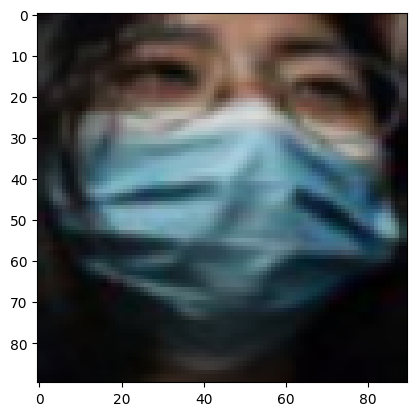

In [ ]:
plt.imshow(X_train[1])

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
from torchvision.transforms import ToPILImage
from torchvision.transforms import Grayscale

class CustomDataset(Dataset):
  def __init__(self, annotations_dir, img_dir, transform=None, target_transform=None):
    
    self.img_dir = img_dir
    self.img_filenames = os.listdir(self.img_dir)
    self.transform = transform
    self.target_transform = target_transform

    self.img_labels = []
    for filename in os.listdir(annotations_dir):
      with open(os.path.join(annotations_dir, filename), 'r') as f:
        label = int(f.read().strip())
        img_filename = filename.replace('.txt', '.jpeg')
        self.img_labels.append((img_filename, label))    

  def __len__(self):
    return len(self.img_labels)
  
  def __getitem__(self, index):
    # Get the image file name and full path
    img_path = os.path.join(self.img_dir, self.img_labels[index][0])
    image = read_image(img_path)
    image = ToPILImage()(image) # Convert tensor to PIL image
    # Convert the image to grayscale
    grayscale_transform = Grayscale(num_output_channels=1)
    image = grayscale_transform(image)
    label = self.img_labels[index][1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label
    



In [ ]:
from torchvision import transforms


# Define the transformations to apply to the training data
transform_train = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), shear=0.1),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomResizedCrop(size=128, scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.RandomRotation(degrees=30),
    transforms.RandomHorizontalFlip(),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])




from torchvision.transforms import ToTensor
train_dataset = CustomDataset(GOOGLE_DRIVE_PATH_LABELS, GOOGLE_DRIVE_PATH_IMAGES, transform=transform_train)
# Create the data loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Define the CNN model architecture
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.conv5 = nn.Conv2d(256, 512, 3, padding=1)
        self.bn5 = nn.BatchNorm2d(512)
        self.conv6 = nn.Conv2d(512, 1024, 3, padding=1)
        self.bn6 = nn.BatchNorm2d(1024)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(1024 * 4 * 4, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 3)
        self.dropout1 = nn.Dropout(p=0.2)
        self.dropout2 = nn.Dropout(p=0.2)
        self.dropout3 = nn.Dropout(p=0.2)
        self.dropout4 = nn.Dropout(p=0.2)
        self.dropout5 = nn.Dropout(p=0.2)
        self.dropout6 = nn.Dropout(p=0.2)

    def forward(self, x):
        x = self.bn1(F.relu(self.conv1(x)))
        x = self.dropout1(x)
        x = self.bn2(F.relu(self.conv2(x)))
        x = self.pool(x)
        x = self.dropout2(x)
        x = self.bn3(F.relu(self.conv3(x)))
        x = self.pool(x)
        x = self.dropout3(x)
        x = self.bn4(F.relu(self.conv4(x)))
        x = self.pool(x)
        x = self.dropout4(x)
        x = self.bn5(F.relu(self.conv5(x)))
        x = self.pool(x)
        x = self.dropout5(x)
        x = self.bn6(F.relu(self.conv6(x)))
        x = self.pool(x)
        x = self.dropout6(x)
        x = x.view(-1, 1024 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

    

In [ ]:
import torch.optim as optim
import torch.nn as nn
import torch



device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# define your CNN architecture
model = MyModel()
model.to(device)


# define the loss function and optimizer

criterion = nn.CrossEntropyLoss(weight=torch.Tensor([3, 1, 7]).to(device))
#criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

# train the model
for epoch in range(30):
    running_loss = 0.0
    running_corrects = 0
    total = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += inputs.size(0)
        if i % 10 == 9:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
        # calculate the error rate and print it at the end of each epoch
        epoch_loss = running_loss / total
        epoch_acc = running_corrects.double() / total
        epoch_error = 1.0 - epoch_acc
        print('Epoch [{}/{}], Loss: {:.4f}, Error: {:.4f}'.format(epoch+1, 10, epoch_loss, epoch_error))

Epoch [1/10], Loss: 1.2218, Error: 0.8438
Epoch [1/10], Loss: 4.9009, Error: 0.5000
Epoch [1/10], Loss: 9.4356, Error: 0.6146
Epoch [1/10], Loss: 7.4185, Error: 0.5781
Epoch [1/10], Loss: 6.3614, Error: 0.5000
Epoch [1/10], Loss: 5.5912, Error: 0.4792
Epoch [1/10], Loss: 5.1424, Error: 0.4554
Epoch [1/10], Loss: 4.5986, Error: 0.4414
Epoch [1/10], Loss: 4.2138, Error: 0.4201
[1,    10] loss: 12.502
Epoch [1/10], Loss: 0.0000, Error: 0.4281
Epoch [1/10], Loss: 0.2259, Error: 0.4375
Epoch [1/10], Loss: 0.3441, Error: 0.4505
Epoch [1/10], Loss: 0.3934, Error: 0.4447
Epoch [1/10], Loss: 0.4924, Error: 0.4330
Epoch [1/10], Loss: 0.6123, Error: 0.4187
Epoch [1/10], Loss: 0.6579, Error: 0.4180
Epoch [1/10], Loss: 0.6798, Error: 0.4228
Epoch [1/10], Loss: 0.6979, Error: 0.4219
Epoch [1/10], Loss: 0.7278, Error: 0.4194
[1,    20] loss: 4.895
Epoch [1/10], Loss: 0.0000, Error: 0.4203
Epoch [1/10], Loss: 0.0694, Error: 0.4241
Epoch [1/10], Loss: 0.1256, Error: 0.4219
Epoch [1/10], Loss: 0.1605, E

In [ ]:
# Define the transformations to apply to the test data
transform_test = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load the test dataset
test_dataset = CustomDataset(GOOGLE_DRIVE_PATH_TEST_LABELS, GOOGLE_DRIVE_PATH_TEST_IMAGES, transform=transform_test)

# Create the test DataLoader
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# Set the model to evaluation mode
model.eval()

# Keep track of the accuracy and loss on the test set
test_loss = 0.0
correct = 0
total = 0
# Initialize empty arrays to store predicted labels and ground truth labels
preds = []
truths = []

# Iterate over the test DataLoader
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        loss = criterion(outputs, labels)
        test_loss += loss.item()  
        # Append predicted labels and ground truth labels to the arrays
        preds.extend(predicted.cpu().numpy())
        truths.extend(labels.cpu().numpy())

# Compute the accuracy and average loss on the test set
accuracy = 100 * correct / total
average_loss = test_loss / len(test_loader)

print('Accuracy on the test set: {:.2f}%'.format(accuracy))
print('Average loss on the test set: {:.4f}'.format(average_loss))

Accuracy on the test set: 90.17%
Average loss on the test set: 0.3405


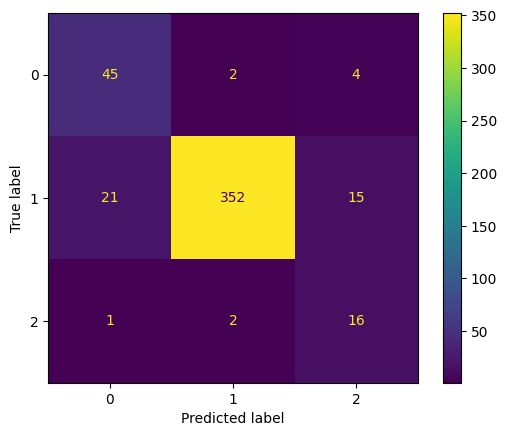

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import svm, metrics

metrics.ConfusionMatrixDisplay.from_predictions(truths, preds)


In [ ]:
print(os.listdir(GOOGLE_DRIVE_PATH))
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/ComputerVision_lab/CW' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)

torch.save(model.state_dict(), GOOGLE_DRIVE_PATH + 'best_CNN_model.pth')

['CV2023_CW_Dataset (1).zip', 'dataset', 'CNN_model.joblib', 'TestFile.ipynb', 'CWTrain.ipynb']
